<a href="https://colab.research.google.com/github/gagan-bhullar-tech/pytorch/blob/main/DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DCGAN - Deep Convolutional GANs

#### Importing the libraries

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as layers
tf.__version__

'2.12.0'

### Loading and preprocessing the dataset

In [31]:
(X_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

In [32]:
X_train.shape

(60000, 28, 28)

In [33]:
y_train.shape

(60000,)

6


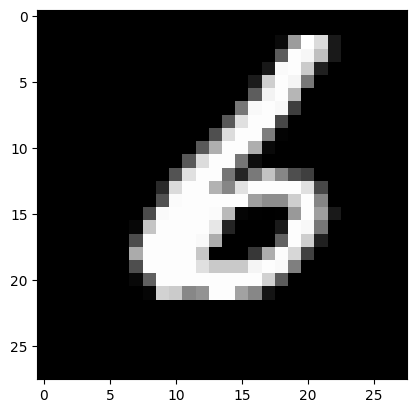

In [34]:
i = np.random.randint(0, 60000)
print(y_train[i])
plt.imshow(X_train[i], cmap='gray')

In [35]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')

In [36]:
X_train.shape

(60000, 28, 28, 1)

In [37]:
X_train[0].min(), X_train[0].max()

(0.0, 255.0)

In [38]:
X_train = (X_train - 127.5) / 127.5

In [39]:
X_train[1].min(), X_train[1].max()

(-1.0, 1.0)

In [40]:
buffer_size = 60000
batch_size = 256

In [41]:
buffer_size / batch_size

234.375

In [42]:
type(X_train)

numpy.ndarray

In [43]:
X_train = tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size).batch(batch_size)

In [44]:
type(X_train)

tensorflow.python.data.ops.batch_op._BatchDataset

In [45]:
X_train

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>

### Building the generator

In [62]:
# 100 -> 12544
import tensorflow.keras as layers

def build_generator():
  network = tf.keras.Sequential()

  # 7x7x256
  network.add(tf.keras.layers.Dense(units = 7*7*256, use_bias = False, input_shape=(100,)))
  network.add(tf.keras.layers.BatchNormalization())
  network.add(tf.keras.layers.LeakyReLU())

  network.add(tf.keras.layers.Reshape((7, 7, 256)))

  # 7x7x128
  network.add(tf.keras.layers.Conv2DTranspose(filters=128, kernel_size = (5, 5), padding = 'same', use_bias = False))
  network.add(tf.keras.layers.BatchNormalization())
  network.add(tf.keras.layers.LeakyReLU())

  # 14x14x64
  network.add(tf.keras.layers.Conv2DTranspose(filters=64, kernel_size = (5, 5), padding = 'same', strides = (2, 2), use_bias = False))
  network.add(tf.keras.layers.BatchNormalization())
  network.add(tf.keras.layers.LeakyReLU())

  # 28x28x1
  network.add(layers.layers.Conv2DTranspose(filters=1, kernel_size = (5, 5), padding = 'same', strides = (2, 2), use_bias = False, activation='tanh'))

  network.summary()
  return network

In [63]:
generator = build_generator()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 12544)             1254400   
                                                                 
 batch_normalization_6 (Batc  (None, 12544)            50176     
 hNormalization)                                                 
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 12544)             0         
                                                                 
 reshape_2 (Reshape)         (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 7, 7, 128)        819200    
 ranspose)                                                       
                                                                 
 batch_normalization_7 (Batc  (None, 7, 7, 128)      

In [64]:
generator.input

<KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'dense_4_input')>

In [73]:
noise = tf.random.normal([1, 100])
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[ 1.0400187 , -1.2008067 , -0.22066645,  1.5112499 , -0.46781278,
         0.32316238, -1.5998002 ,  0.63144344, -1.3777511 ,  2.2527268 ,
        -0.07488645,  0.20964251, -0.7635827 ,  0.32428288,  1.0134727 ,
         0.869823  ,  0.37433538, -0.16828763,  0.7806123 ,  0.24098004,
        -0.37952524,  1.0575837 , -1.2823244 , -0.79985034, -0.3495551 ,
         0.3263692 ,  0.823095  ,  1.4329345 ,  1.5678135 ,  0.27895147,
         0.4123059 ,  0.82960725,  0.28927696,  0.9637466 ,  1.1099583 ,
         0.593252  ,  2.830766  , -0.6767016 ,  0.4212563 , -1.0425539 ,
        -0.9556203 , -1.6280005 ,  1.09424   , -1.6491433 ,  0.44441625,
        -0.46644133,  0.40265885,  0.8481925 ,  0.992683  , -1.8181082 ,
         1.4111844 ,  0.7384365 ,  0.85577434, -1.9437225 ,  1.4085505 ,
         0.13219552,  0.7402437 , -1.3049046 ,  1.6171471 ,  2.3096473 ,
        -1.3227763 ,  1.4632473 , -1.0208273 , -0.80502343, -1.314633  ,
 

In [76]:
generated_image = generator(noise, training = False)

In [77]:
generated_image.shape

TensorShape([1, 28, 28, 1])

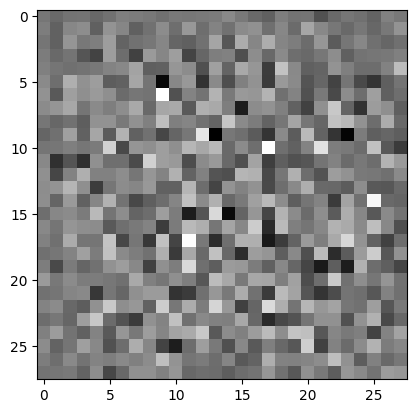

In [78]:
plt.imshow(generated_image[0, :, :, 0], cmap = 'gray')